In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("Train.csv",na_values={"Item_Visibility":[0]})
#test = pd.read_csv("Test.csv",na_values={"Item_Visibility":[0]})
print(train.shape)
#print(test.shape)

(8523, 12)


In [4]:
train.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [6]:
train['source']='train'
#test['source']='test'


In [7]:
#data = pd.concat([train,test],ignore_index=True)
data = train

In [8]:
print(data.shape)
data.describe()


(8523, 13)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7997.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,1997.831867,2181.288914
std,4.643456,0.050308,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.031403,93.826500,1987.000000,834.247400
50%,12.600000,0.057792,143.012800,1999.000000,1794.331000
75%,16.850000,0.098109,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
sns.countplot(train.Item_Fat_Content)

ValueError: ignored

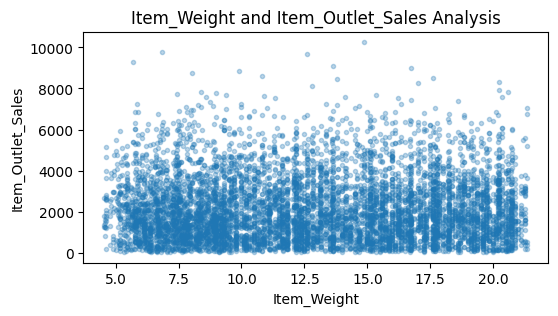

In [10]:
plt.figure(figsize=(6,3))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

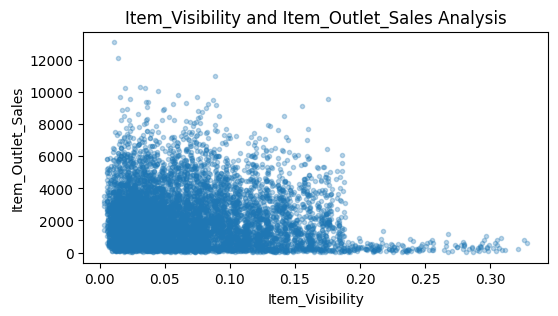

In [11]:
plt.figure(figsize=(6,3))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

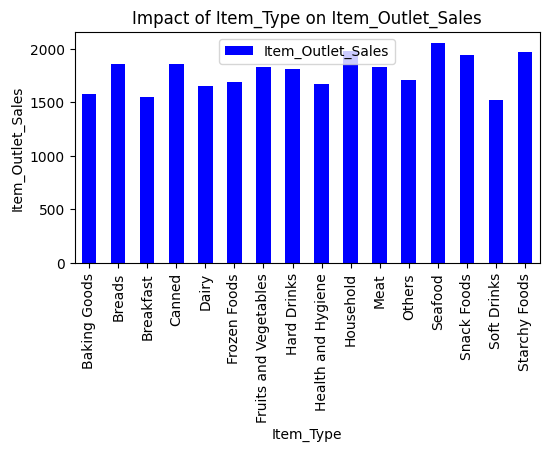

In [12]:
Item_Type_Pivot = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_Pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

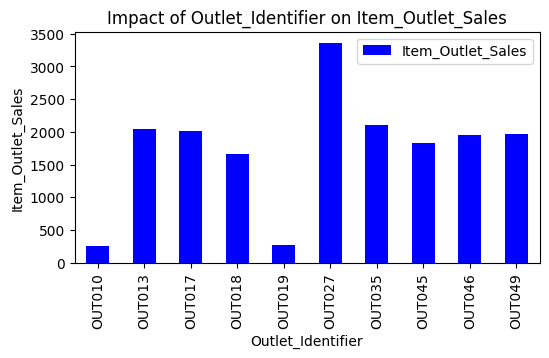

In [13]:
Outlet_Identifier_Pivot = \
train.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_Pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

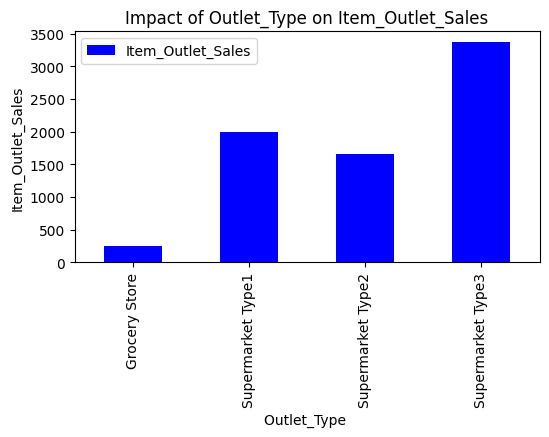

In [14]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

In [15]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [16]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
source                          1
dtype: int64

In [17]:
col = ["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size"]

In [18]:
print("freq distribution for each categorial column is-- \n")
for i in col:
    print("\n"+i)
    print(data[i].value_counts())

freq distribution for each categorial column is-- 


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [19]:
# Replacing NaN values in Item_Weight with the mean value
data.fillna({"Item_Weight": data["Item_Weight"].mean()},inplace=True)

In [20]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [21]:
data['Outlet_Size'].fillna(method='ffill',inplace=True)

In [22]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
source                         0
dtype: int64

In [23]:
# working on visibility
visibilty_avg=data.pivot_table(values="Item_Visibility",index="Item_Identifier")

In [24]:
print( visibilty_avg)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.047934
DRA24                   0.048062
DRA59                   0.153963
DRB01                   0.082126
DRB13                   0.008002
...                          ...
NCZ30                   0.029116
NCZ41                   0.064529
NCZ42                   0.011305
NCZ53                   0.027775
NCZ54                   0.093831

[1559 rows x 1 columns]


In [25]:
itm_visi = data.groupby('Item_Type')

In [26]:
data['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [32]:
data['Outlet_Years'] = 2023 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()
#data['Outlet_Years']
#data['Outlet_Establishment_Year']

count    8523.000000
mean       25.168133
std         8.371760
min        14.000000
25%        19.000000
50%        24.000000
75%        36.000000
max        38.000000
Name: Outlet_Years, dtype: float64

In [33]:
data_frames=[]
for item,item_df in itm_visi:
    data_frames.append(itm_visi.get_group(item))
for i in data_frames:
    i["Item_Visibility"].fillna(value=i["Item_Visibility"].mean(),inplace=True)
    i["Item_Outlet_Sales"].fillna(value=i["Item_Outlet_Sales"].mean(),inplace=True)



In [39]:
print(data_frames)

[     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5              FDP36    10.395000          Regular         0.074331   
21             FDW12    12.857645          Regular         0.035400   
23             FDC37    12.857645          Low Fat         0.057557   
48             FDL12    15.850000          Regular         0.121633   
71             FDL12    15.850000          Regular         0.121532   
...              ...          ...              ...              ...   
8435           FDT48    12.857645          Low Fat         0.074331   
8441           FDK60    16.500000          Regular         0.094010   
8465           FDX11    16.000000          Regular         0.106969   
8515           FDH24    20.700000          Low Fat         0.021518   
8519           FDS36     8.380000          Regular         0.046982   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
5     Baking Goods   51.4008            OUT018                       

In [40]:
new_data=pd.concat(data_frames)

In [41]:
print(new_data)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5              FDP36    10.395000          Regular         0.074331   
21             FDW12    12.857645          Regular         0.035400   
23             FDC37    12.857645          Low Fat         0.057557   
48             FDL12    15.850000          Regular         0.121633   
71             FDL12    15.850000          Regular         0.121532   
...              ...          ...              ...              ...   
8360           FDA34    11.500000          Low Fat         0.014884   
8397           FDC59    16.700000          Regular         0.054851   
8411           FDD47     7.600000          Regular         0.142632   
8426           FDA22     7.435000          Low Fat         0.084436   
8463           FDG59    12.857645          Low Fat         0.043025   

          Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
5      Baking Goods   51.4008            OUT018                      

In [42]:
new_data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
Outlet_Years                 0
dtype: int64

In [43]:
new_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
new_data['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [45]:
new_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data=new_data
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type'])


In [47]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,Outlet,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
5,FDP36,10.395000,0.074331,51.4008,OUT018,2009,556.6088,train,14,3,...,0,0,0,0,0,0,0,0,0,0
21,FDW12,12.857645,0.035400,144.5444,OUT027,1985,4064.0432,train,38,5,...,0,0,0,0,0,0,0,0,0,0
23,FDC37,12.857645,0.057557,107.6938,OUT019,1985,214.3876,train,38,4,...,0,0,0,0,0,0,0,0,0,0
48,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,train,26,8,...,0,0,0,0,0,0,0,0,0,0
71,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,train,36,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [50]:
train = data.loc[data['source']=="train"]
#test = data.loc[data['source']=="test"]
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Outlet,Item_Fat_Content_0,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
5,FDP36,10.395000,0.074331,51.4008,OUT018,556.6088,train,14,3,0,...,0,0,0,0,0,0,0,0,0,0
21,FDW12,12.857645,0.035400,144.5444,OUT027,4064.0432,train,38,5,0,...,0,0,0,0,0,0,0,0,0,0
23,FDC37,12.857645,0.057557,107.6938,OUT019,214.3876,train,38,4,1,...,0,0,0,0,0,0,0,0,0,0
48,FDL12,15.850000,0.121633,60.6220,OUT046,2576.6460,train,26,8,0,...,0,0,0,0,0,0,0,0,0,0
71,FDL12,15.850000,0.121532,59.2220,OUT013,599.2200,train,36,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,FDA34,11.500000,0.014884,174.5080,OUT049,3635.2680,train,24,9,1,...,0,0,0,0,0,0,0,0,0,1
8397,FDC59,16.700000,0.054851,64.4168,OUT018,830.9184,train,14,3,0,...,0,0,0,0,0,0,0,0,0,1
8411,FDD47,7.600000,0.142632,172.3448,OUT049,4431.5648,train,24,9,0,...,0,0,0,0,0,0,0,0,0,1
8426,FDA22,7.435000,0.084436,168.6158,OUT035,4512.1266,train,19,6,1,...,0,0,0,0,0,0,0,0,0,1


In [51]:
#Drop unnecessary columns:
#test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [52]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
#test.to_csv("test_modified.csv",index=False)

In [53]:
x_label = ['Item_MRP', 'Item_Visibility', 'Item_Weight','Outlet_Years', 'Outlet', 'Item_Fat_Content_0','Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0','Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1','Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9','Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Item_Type_15']
y_label = ['Item_Outlet_Sales']

In [42]:
# from sklearn import preprocessing
# X= train[x_label].values
# y= train[y_label].values

# min_max_scaler = preprocessing.MinMaxScaler()
# X = min_max_scaler.fit_transform(X)

# x=np.insert(X,0,1,axis=1)   #for bias b

In [43]:
# def calculate_weight(x,y,epoch,print_interval):
#     print("Iteration","Error","Bias","\tWeight",sep="\t\t\t")
#     theta = np.zeros(len(x[0]))
#     m=y.size
#     for i in range(epoch):
#         h = (x@theta).reshape(-1,1)
#         error = ((y-h)**2).mean()
#         theta = theta - 0.0001*(1/m)*(x.T.dot(h-y)).reshape(-1)
#         print(str(i).center(10),error,theta[0],theta[1],sep="\t\t") if not i%print_interval else ""
#     print(str(i+1).center(10),error,theta[0],theta[1],sep="\t\t")
#     return theta


In [44]:
#  theta = calculate_weight(X,y,1000000,50000)

In [45]:
# rmse = np.sqrt(1275245.635843266)
# print(rmse)

In [46]:
# def Predict(p,theta):
#     return p@theta

# predictions = Predict(X,theta)
# print(predictions)


In [54]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [56]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s e

In [64]:
#Pycaret Testing
from pycaret.regression import *
import time
start_time = time.time()
df = pd.read_csv('train_modified.csv')
#x_label , y_label
data1 = df.drop(columns=x_label)

s = setup(data , target=target ,session_id =123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 37)"
4,Transformed data shape,"(8523, 46)"
5,Transformed train set shape,"(5966, 46)"
6,Transformed test set shape,"(2557, 46)"
7,Numeric features,33
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,881.8385,1450181.7064,1202.4732,0.5077,0.7238,0.9588,0.4710
gbr,Gradient Boosting Regressor,856.4911,1536349.6448,1238.1911,0.4764,0.5941,0.6138,1.3090
lightgbm,Light Gradient Boosting Machine,869.9069,1602543.1974,1264.8635,0.4531,0.5951,0.6106,1.0700
rf,Random Forest Regressor,879.2109,1635851.6981,1278.0630,0.4419,0.5926,0.6018,4.0130
lr,Linear Regression,942.8891,1651555.1069,1283.8336,0.4375,0.7735,1.0696,0.7690
ridge,Ridge Regression,942.9424,1651874.9833,1283.9587,0.4374,0.7740,1.0694,0.1280
lasso,Lasso Regression,942.7445,1653336.4895,1284.5426,0.4369,0.7703,1.0669,0.3300
br,Bayesian Ridge,943.7915,1656576.8188,1285.7935,0.4358,0.7693,1.0666,0.1420
llar,Lasso Least Angle Regression,944.4711,1664463.5686,1288.7851,0.4331,0.7716,1.0644,0.1320
et,Extra Trees Regressor,888.7397,1669336.5357,1291.2539,0.4299,0.5938,0.6033,3.2920


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [48]:
#decision tree model
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg0 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
alg0.fit(train[predictors], train[target])
train_predictions0 = alg0.predict(train[predictors])
cv_score0 = np.mean(cross_val_score(alg0,train[predictors], train[target], cv=20))

#test[target] = alg0.predict(test[predictors])

IDcol.append(target)
submission = pd.DataFrame({x : test[x] for x in IDcol})
submission.to_csv("predictions.csv", index = False)

rmse0 = np.sqrt(mean_squared_error(train[target].values, train_predictions0))

In [49]:
print("cv_score : ",cv_score0)
print("RMSE : " ,rmse0)
print("Accuracy : ",alg0.score( train[predictors],train[target]))

cv_score :  0.5874744065028809
RMSE :  1059.1553245838138
Accuracy :  0.6147364903595223


In [50]:
df = pd.read_csv("predictions.csv")
new_df =df.loc[(df['Item_Identifier'] == "FDL48")& (df['Outlet_Identifier'] == "OUT018")]
pred = new_df['Item_Outlet_Sales']
print(pred.values[0])

711.0628208695651


In [53]:

from sklearn.ensemble import RandomForestRegressor
alg1 = RandomForestRegressor(max_depth=2,random_state=0, n_estimators=100)
alg1.fit(train[predictors], train[target])
train_predictions1 = alg1.predict(train[predictors])
cv_score1 = np.mean(cross_val_score(alg1,train[predictors], train[target], cv=20))
rmse1 = np.sqrt(mean_squared_error(train[target].values, train_predictions1))

In [54]:
print("cv_score : ",cv_score1)
print("RMSE : " ,rmse1)
print("Accuracy : ",alg1.score( train[predictors],train[target]))

cv_score :  0.45114993726367586
RMSE :  1262.8411451956108
Accuracy :  0.4523084812624223


In [55]:
from sklearn.linear_model import LinearRegression

alg2 = LinearRegression()
alg2.fit(train[predictors], train[target])
train_predictions2 = alg2.predict(train[predictors])
cv_score2 = np.mean(cross_val_score(alg2,train[predictors], train[target], cv=20))
rmse2 = np.sqrt(mean_squared_error(train[target].values, train_predictions2))


In [56]:
print("cv_score : ",cv_score2)
print("RMSE : " ,rmse2)
print("Accuracy : ",alg2.score( train[predictors],train[target]))

cv_score :  0.5580525051909991
RMSE :  1128.2534605802773
Accuracy :  0.5628284237955508


In [68]:
from sklearn.svm import SVR
alg3 = SVR(kernel="rbf",C=2e4)
alg3.fit(train[predictors], train[target])
train_predictions3 = alg3.predict(train[predictors])
cv_score3 = np.mean(cross_val_score(alg3,train[predictors], train[target], cv=20))
rmse3 = np.sqrt(mean_squared_error(train[target].values, train_predictions3))

In [69]:
print("cv_score : ",cv_score3)
print("RMSE : " ,rmse3)
print("Accuracy : ",alg3.score( train[predictors],train[target]))

cv_score :  0.5282034205893069
RMSE :  1164.0407569688011
Accuracy :  0.5346551174313636


In [59]:
test[target] = alg3.predict(test[predictors])

IDcol.append(target)
submission = pd.DataFrame({x : test[x] for x in IDcol})
submission.to_csv("SVRpredictions.csv", index = False)


In [60]:
df = pd.read_csv("SVRpredictions.csv")
new_df =df.loc[(df['Item_Identifier'] == "FDL48")& (df['Outlet_Identifier'] == "OUT018")]
pred = new_df['Item_Outlet_Sales']
print(pred.values[0])

644.6662834166618


In [61]:
#MERGING
# importing pandas
import pandas as pd

# merging two csv files
df_merged = pd.concat(
	map(pd.read_csv, ['test_modified.csv', 'train_modified.csv']), ignore_index=True)
print(df_merged)
df_merged.to_csv('merged.csv')


      Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0               FDL48    19.350000         0.082602   50.1034   
1               FDC48    12.792854         0.015782   81.0592   
2               FDA36     5.985000         0.005698  186.8924   
3               FDM24     6.135000         0.079451  151.6366   
4               FDD48    10.395000         0.050479  114.0176   
...               ...          ...              ...       ...   
14199           FDA34    11.500000         0.014884  174.5080   
14200           FDC59    16.700000         0.054851   64.4168   
14201           FDD47     7.600000         0.142632  172.3448   
14202           FDA22     7.435000         0.084436  168.6158   
14203           FDG59    12.792854         0.043025   37.6164   

      Outlet_Identifier  Outlet_Years  Outlet  Item_Fat_Content_0  \
0                OUT018             4       3                   0   
1                OUT027            28       5                   1   
2           

In [62]:
df_merged.size


511344

In [63]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.7 MB/s e

In [66]:
from pycaret.regression import *


In [67]:
df_merged.head

<bound method NDFrame.head of       Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0               FDL48    19.350000         0.082602   50.1034   
1               FDC48    12.792854         0.015782   81.0592   
2               FDA36     5.985000         0.005698  186.8924   
3               FDM24     6.135000         0.079451  151.6366   
4               FDD48    10.395000         0.050479  114.0176   
...               ...          ...              ...       ...   
14199           FDA34    11.500000         0.014884  174.5080   
14200           FDC59    16.700000         0.054851   64.4168   
14201           FDD47     7.600000         0.142632  172.3448   
14202           FDA22     7.435000         0.084436  168.6158   
14203           FDG59    12.792854         0.043025   37.6164   

      Outlet_Identifier  Outlet_Years  Outlet  Item_Fat_Content_0  \
0                OUT018             4       3                   0   
1                OUT027            28       5      

In [81]:
data = pd.read_csv('merged.csv')
s = setup(data, target='Item_Outlet_Sales',session_id = 123)
best = compare_models()

ValueError: ignored